## K-Means Example

The k-Means algorithm is a clustering algorithm that assigns data points from a dataset into a specified number of groupings. To use the algorithm, one must determine the number of groups that the datapoints will be assigned to, which we will refer to as k. Then, k points are randomly chosen in the vector space that the dataset resides in. These k points are called centroids. Next, for each data point, the Euclidean distance is calculated from the point to each one of the centroids. After each of these k distances are calculated for a particular data point, the point is assigned to the centroid that it is closest to. This creates k groupings of points.

Once this process is completed, the mean point of each these k groupings is calculated, generating k new points. These new points become the new centroids for the next iteration of the algorithm, when each of the data points are then assigned to the closest of the k new centroids. If the groupings remain unchanged as they were in the previous iteration, then the algorithm has reached convergence and is completed. Otherwise the process repeats until convergence is reached, or the number of iterations has reached some specified number set as the maxinum number of iterations that the algorithm will run through. The algorithm's output is the groupings that are created in the final iteration.

This tutorial will take you through an example of implementing the algorithm on a dataset using the Sci-Kit Learn Python libray. The first step will be to import the library, along with numpy.

In [1]:
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, we'll load the dataset into a numpy array. The dataset we will use has 52 features, with each feature being the quantity of a particular good that was sold in a different calendar week throughout the year. The dataset contains this information for over 800 different products. Unfortunately, I did not have access to the actual paper that the dataset was originally from, only the raw data itself. Therefore, I don't have any other information about the data such as which specific products were used, or when/where the data was sampled from. Nonetheless, it is still sufficient to demonstrate the k-Means algorithm. 

Additionally, the data has already been normalized, which is important when using the k-Means algorithm to avoid bias in the distance calculations.

In [2]:
data = np.loadtxt(open("product_data.csv", "rb"), delimiter=",", skiprows=1)

print('The shape of the data is: ' + str(data.shape))

The shape of the data is: (811, 52)


We will apply the K-means algorithm on the data. We'll set k equal to 8, and set the maxinum number of iterations to 300. Additionally, Sci-Kits implementation of k-Means will run through the algorithm 10 different times, with each time having different randomly generated points for the initial centroids. The final output will be the result of the best of each of these 10 different run-throughs of the entire algorithm. 

Lastly, we will set the random_state, so that the same results are achieved with every call of the codebox below.

In [3]:
kmeans = KMeans(n_clusters=8, init = 'random', max_iter = 300, random_state = 1).fit(data)

Below, we can see each grouping that each datapoint has been assigned to, which are represented as an integers in the range [0, 7]

In [4]:
labels = kmeans.labels_
labels

array([4, 4, 2, 4, 4, 4, 4, 0, 0, 0, 4, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 4, 1, 2, 2, 4, 2, 0, 0, 0, 2, 0, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 2, 4, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 4, 2, 0, 2, 4, 4, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       0, 1, 1, 4, 2, 1, 4, 7, 2, 2, 0, 4, 4, 1, 0, 7, 0, 4, 7, 4, 2, 2, 2,
       1, 4, 4, 2, 2, 4, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 4, 2, 0, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 2, 1, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0,
       4, 4, 0, 0, 4, 2, 4, 4, 2, 0, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 1, 1, 1, 4, 1, 0, 1, 7, 1, 1,
       1, 1, 1, 2, 3, 3, 6, 6, 3, 5, 3, 3, 5, 3, 3, 6, 7, 5, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 3, 6, 6, 3, 6, 3, 3, 3, 5, 6, 6, 6, 6, 3, 6, 6, 5, 3, 5,
       6, 3, 6, 7, 6, 6, 6, 1, 1, 7, 1, 4, 1, 0, 1, 1, 1, 7, 6, 5, 3, 6, 6,
       3, 3, 6, 3, 7, 3, 6, 2, 1, 1, 5, 7, 3, 3, 4, 4, 4, 4, 1, 1, 4, 0, 0,
       0, 4,

Using np.bincount, we can figure out the frequency of each of the groupings in the array. The first value in the below array is the number of data points in grouping 0, the second value is the number of data points in grouping 1, etc.

In [5]:
counts = np.bincount(labels)
counts

array([ 92, 138, 111, 119, 124,  31, 100,  96])

Below is a bar graph that illustrates the number of data points in each grouping. As you can see, there is an approximatley equal number of data points in each of the groupings, except for grouping 5. 

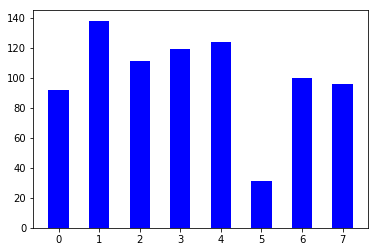

In [6]:
fig, ax = plt.subplots()
ax.bar(range(len(counts)), counts, width=.5, color = 'b')
plt.show()

We'd like to actually be able to visualize the groupings using a scatterplot. However, with 52-dimensional data, this is impossible. Luckily, we can use principal component analysis and reduce the dimensionality down to only 2 dimensions, and then apply k-Means on this transformed dataset. We'll use the PCA module from Sci-Kit learn, which is imported below.

In [7]:
from sklearn.decomposition import PCA

Apply PCA, and verify that the data still has the same number of data points as the normal dataset, but with only 2 dimensions instead of 52.

In [8]:
pca_data = PCA(n_components=2).fit_transform(data)

print('The shape of the data is: ' + str(pca_data.shape))

The shape of the data is: (811, 2)


Now, run KMeans, using the same parameters as before

In [9]:
kmeans_pca = KMeans(n_clusters=8, init = 'random', max_iter = 300, random_state = 1).fit(data)
labels_pca = kmeans_pca.labels_
labels_pca

array([4, 4, 2, 4, 4, 4, 4, 0, 0, 0, 4, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 4, 1, 2, 2, 4, 2, 0, 0, 0, 2, 0, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 2, 4, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 4, 2, 0, 2, 4, 4, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2,
       0, 1, 1, 4, 2, 1, 4, 7, 2, 2, 0, 4, 4, 1, 0, 7, 0, 4, 7, 4, 2, 2, 2,
       1, 4, 4, 2, 2, 4, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 4, 2, 0, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 2, 1, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0,
       4, 4, 0, 0, 4, 2, 4, 4, 2, 0, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 1, 1, 1, 4, 1, 0, 1, 7, 1, 1,
       1, 1, 1, 2, 3, 3, 6, 6, 3, 5, 3, 3, 5, 3, 3, 6, 7, 5, 6, 6, 6, 5, 6,
       6, 6, 5, 6, 3, 6, 6, 3, 6, 3, 3, 3, 5, 6, 6, 6, 6, 3, 6, 6, 5, 3, 5,
       6, 3, 6, 7, 6, 6, 6, 1, 1, 7, 1, 4, 1, 0, 1, 1, 1, 7, 6, 5, 3, 6, 6,
       3, 3, 6, 3, 7, 3, 6, 2, 1, 1, 5, 7, 3, 3, 4, 4, 4, 4, 1, 1, 4, 0, 0,
       0, 4,

Interestingly, the assigned groupings of the PCA data are the same as the normal data. This is verified with the code below:

In [10]:
labels == labels_pca

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Now, we'll load the PCA data into a Pandas dataframe, which will then be used to create a scatterplot

In [11]:
df = pd.DataFrame()
df['PCA_1'] = pca_data[:, 0]
df['PCA_2'] =pca_data[:, 1]
df['Grouping'] = labels_pca
df.head(20)

,PCA_1,PCA_2,Grouping
0,-0.487869,-0.450908,4
1,-0.626115,-0.308341,4
2,-1.451752,-0.035126,2
3,-0.427121,-0.222939,4
4,-0.489233,-0.105435,4
5,-0.528947,0.080270,4
6,-0.829618,-0.284876,4
7,-1.118031,0.141945,0
8,-1.425127,0.059311,0
9,-0.995023,-0.007283,0


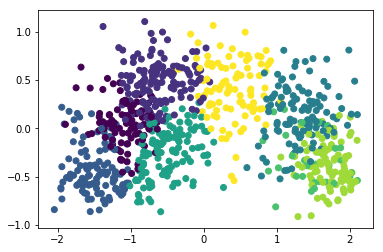

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['PCA_1'], df['PCA_2'], c = df['Grouping'])
plt.show()

In the scatterplot, each of the 8 groupings is a different color.

Bibliography:

Data pulled from the following paper:

Tan, Swee Chuan and San Lau, Jess Pei. "Time series clustering: A superior alternative for market basket analysis." Proceedings of the First International Conference on Advanced Data and Information Engineering (DaEng-2013): 241-248.
Direct URL to raw data: https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly#

Other sources used:

Victor Lavrenko. "K-means clustering: how it works." Filmed [Jan 2013]. YouTube video, 07:34. Posted [Jan 2013]. https://youtu.be/_aWzGGNrcic

"Sklearn.cluster.KMeans." Sklearn.cluster.KMeans — scikit-learn 0.19.1 documentation. Accessed November 20, 2017. http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

"Sklearn.decomposition.PCA." Sklearn.decomposition.PCA — scikit-learn 0.19.1 documentation. Accessed November 20, 2017. http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.